# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Syafiq Mu'ayyad
- **Email:** syafiqmuayyad7@gmail.com
- **ID Dicoding:** syafiqmuayyad

## Menentukan Pertanyaan Bisnis

- Apakah perubahan suhu mempengaruhi penyewaan sepeda?
- Kapan tingkat penyewaan tertinggi dalam setahun?

## Import Semua Packages/Library yang Digunakan

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Proses ini berguna untuk mengumpulkan data tentang penyewaan sepeda, dalam hal ini yaitu day.csv & hour.csv 

In [187]:
day_dt = pd.read_csv('data\\day.csv')
day_dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [188]:
hour_dt = pd.read_csv('data\\hour.csv')
hour_dt.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

dalam tahap ini, data akan dicek, seperti : tipe data, nilai yang kosong, duplikasi dan nilai yang tidak tepat

In [189]:
day_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [190]:
day_dt.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [191]:
hour_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [192]:
hour_dt.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [193]:
day_dt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [194]:
hour_dt.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

pada tahap ini, data akan dirapikan, kolom yang tidak berguna akan dibuang

In [195]:
#Menghapus kolom instant
day_dt.drop(['instant'], axis = 1, inplace= True)
hour_dt.drop(['instant'], axis = 1, inplace= True)

In [205]:
day_dt = day_dt.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'temp': 'temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    })

In [204]:
hour_dt = hour_dt.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'temp': 'temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    })

In [238]:
#Mengganti tipe data dari 'float64' menajadi 'category'
columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
 
for column in columns:
    day_dt[column] =  day_dt[column].astype("category")
    hour_dt[column] =  hour_dt[column].astype("category")

In [239]:
# Mengganti nilai pada kolom 'season'
hour_dt['season'] = hour_dt['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
day_dt['season'] = day_dt['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Mengganti nilai pada kolom 'year' dengan replace
hour_dt['year'] = hour_dt['year'].cat.rename_categories({0: '2011', 1: '2012'})
day_dt['year'] = day_dt['year'].cat.rename_categories({0: '2011', 1: '2012'})

# Mengganti nilai pada kolom 'month'
hour_dt['month'] = hour_dt['month'].cat.rename_categories({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
day_dt['month'] = day_dt['month'].cat.rename_categories({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Mengganti nilai pada kolom 'holiday'
hour_dt['holiday'] = hour_dt['holiday'].cat.rename_categories({0: 'No', 1: 'Yes'})
day_dt['holiday'] = day_dt['holiday'].cat.rename_categories({0: 'No', 1: 'Yes'})

# Mengganti nilai pada kolom 'weekday'
hour_dt['weekday'] = hour_dt['weekday'].cat.rename_categories({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_dt['weekday'] = day_dt['weekday'].cat.rename_categories({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Mengganti nilai pada kolom 'workingday'
hour_dt['workingday'] = hour_dt['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})
day_dt['workingday'] = day_dt['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})

# Mengganti nilai pada kolom 'weathersit'
hour_dt['weathersit'] = hour_dt['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Ice Pallets'})
day_dt['weathersit'] = day_dt['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Ice Pallets'})

In [200]:
day_dt.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,wind_speed,casual_users,registered_users,cnt
0,2011-01-01,Winter,2011,January,No,Saturday,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,January,No,Sunday,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,January,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [201]:
hour_dt.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,wind_speed,casual_users,registered_users,cnt
0,2011-01-01,Winter,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore day_dt table

In [206]:
day_dt.describe(include="all")

,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,wind_speed,casual_users,registered_users,cnt
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-31,Summer,2012,January,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [207]:
print("Statistik Deskriptif untuk Suhu dan Jumlah Penyewaan:")
day_dt[['temperature', 'cnt']].describe()

Statistik Deskriptif untuk Suhu dan Jumlah Penyewaan:


,temperature,cnt
count,731.000000,731.000000
mean,0.495385,4504.348837
std,0.183051,1937.211452
min,0.059130,22.000000
25%,0.337083,3152.000000
50%,0.498333,4548.000000
75%,0.655417,5956.000000
max,0.861667,8714.000000


Statistik ini berfungsi untuk mengetahui distribusi dasar dari suhu dan jumlah penyewaan sepeda, misalnya apakah suhu rata-rata ada di kisaran tertentu dan bagaimana sebaran penyewaan sepeda terjadi pada dataset.

In [208]:
# Membuat kategori suhu (sangat dingin, dingin, sedang, hangat, panas)
day_dt['temp_range'] = pd.cut(day_dt['temperature'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], 
                                labels=['Sangat Dingin', 'Dingin', 'Sedang', 'Hangat', 'Panas'])

# Menghitung rata-rata penyewaan sepeda berdasarkan kategori suhu
avg_rentals_by_temp = day_dt.groupby('temp_range', observed=True)['cnt'].mean().reset_index()

print("Rata-rata Penyewaan Sepeda Berdasarkan Kategori Suhu:")
print(avg_rentals_by_temp)

Rata-rata Penyewaan Sepeda Berdasarkan Kategori Suhu:
      temp_range          cnt
0  Sangat Dingin  1543.235294
1         Dingin  3178.546256
2         Sedang  5011.208333
3         Hangat  5714.340336
4          Panas  4765.312500


Suhu dibagi menjadi beberapa kategori agar proses analisis tentang bagaimana jumlah penyewaan sepeda bervariasi berdasarkan kondisi cuaca menjadi lebih mudah. Dengan pengelompokan seperti ini, kita bisa membandingkan rata-rata penyewaan sepeda di tiap kategori suhu secara lebih jelas.

In [209]:
correlation = day_dt[['temperature', 'cnt']].corr()
print("Korelasi antara Suhu dan Jumlah Penyewaan Sepeda:")
print(correlation.iloc[0, 1])

Korelasi antara Suhu dan Jumlah Penyewaan Sepeda:
0.6274940090334914


Menghitung korelasi bertujuan untuk mengukur seberapa kuat hubungan antara suhu dan jumlah penyewaan sepeda. Jika hasil korelasi mendekati 1, ini menunjukkan bahwa suhu hangat memang memiliki dampak positif yang kuat terhadap penyewaan sepeda.

In [212]:
# Menghitung rata-rata penyewaan sepeda berdasarkan bulan
avg_rentals_by_month = day_dt.groupby('month', observed=True)['cnt'].mean().reset_index()

print("Rata-rata Penyewaan Sepeda Berdasarkan Bulan:")
print(avg_rentals_by_month)

Rata-rata Penyewaan Sepeda Berdasarkan Bulan:
        month          cnt
0     January  2176.338710
1    February  2655.298246
2       March  3692.258065
3       April  4484.900000
4         May  5349.774194
5        June  5772.366667
6        July  5563.677419
7      August  5664.419355
8   September  5766.516667
9     October  5199.225806
10   November  4247.183333
11   December  3403.806452


Mengetahui rata-rata penyewaan sepeda di setiap bulan berfungsi untuk mengetahui kapan dalam setahun permintaan untuk sepeda paling tinggi. Ini bisa membantu dalam perencanaan bisnis, seperti meningkatkan ketersediaan sepeda di bulan-bulan sibuk.

In [214]:
# Menampilkan statistik deskriptif penyewaan sepeda per bulan
rentals_stats_by_month = day_dt.groupby('month', observed=True)['cnt'].describe()

print("Statistik Deskriptif Penyewaan Sepeda Berdasarkan Bulan:")
print(rentals_stats_by_month)

Statistik Deskriptif Penyewaan Sepeda Berdasarkan Bulan:
           count         mean          std     min      25%     50%      75%  \
month                                                                          
January     62.0  2176.338710  1161.674370   431.0  1251.75  1939.0  3235.75   
February    57.0  2655.298246  1145.313307  1005.0  1623.00  2402.0  3777.00   
March       62.0  3692.258065  1899.301812   605.0  2077.00  3216.5  5361.00   
April       60.0  4484.900000  1776.160778   795.0  3188.25  4293.5  6205.25   
May         62.0  5349.774194  1298.711561  2633.0  4409.00  4890.5  6405.50   
June        60.0  5772.366667  1240.400031  3767.0  4834.50  5308.5  6983.00   
July        62.0  5563.677419  1273.751871  3285.0  4491.50  5446.5  6678.75   
August      62.0  5664.419355  1494.516146  1115.0  4582.50  5229.5  7121.00   
September   60.0  5766.516667  1810.130649  1842.0  4532.00  5384.0  7509.25   
October     62.0  5199.225806  1988.392517    22.0  3967.25  50

terlihat disini penggunaan sepeda paling tinggi terjadi pada bulan juni dan oktober. Statistik ini juga membantu dalam mendeteksi apakah ada variasi yang besar antar bulan dalam hal permintaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Apakah perubahan suhu mempengaruhi penyewaan sepeda?

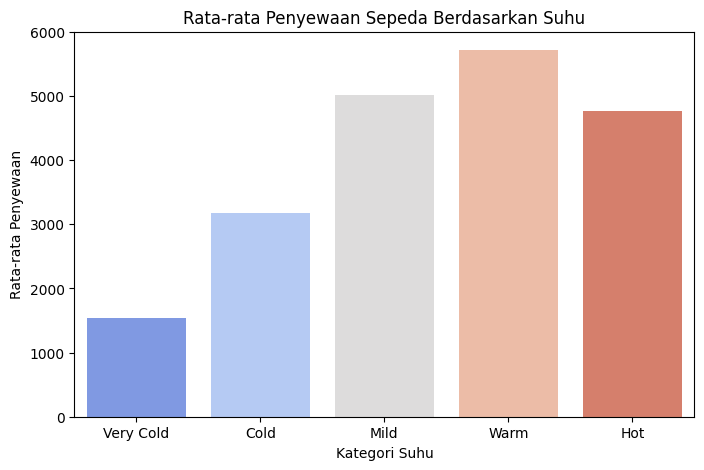

In [215]:
# Membuat kategori suhu
day_dt['temperature_range'] = pd.cut(day_dt['temperature'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], 
                                labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])

# Menghitung rata-rata penyewaan sepeda berdasarkan kategori suhu
avg_rentals_by_temperature = day_dt.groupby('temperature_range', observed=True)['cnt'].mean().reset_index()

# Plot hubungan antara suhu dan penyewaan sepeda
plt.figure(figsize=(8,5))
sns.barplot(x='temperature_range', y='cnt', data=avg_rentals_by_temperature, hue = 'temperature_range', palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

Berdasarkan diagram tersebut dapat dilihat penyewaan sepeda paling tinggi terjadi saat suhu hangat(warm)

### Pertanyaan 2: Kapan tingkat penyewaan tertinggi dalam setahun?

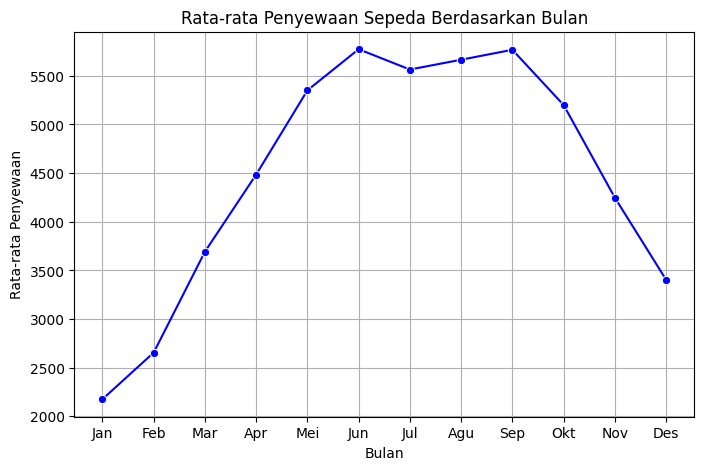

In [216]:
# Menambahkan kolom bulan
day_dt['month'] = pd.to_datetime(day_dt['date']).dt.month

# Menghitung rata-rata penyewaan sepeda berdasarkan bulan
avg_rentals_by_month = day_dt.groupby('month')['cnt'].mean().reset_index()

# Visualisasi tren sepanjang tahun
plt.figure(figsize=(8,5))
sns.lineplot(x='month', y='cnt', data=avg_rentals_by_month, marker='o', color='b')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.show()

Terlihat penyewaan sepeda tertinggi terjadi pada bulan juni dan september, dan penyewaan terendah pada bulan januari

## Analisis Lanjutan (Opsional)

### Clustering

1. Membuat grup berdasarkan waktu hari
   - Morning(06.00-12.00)
   - Afternoon(12.00-18.00)
   - Evening(18.00-00.00)
   - Night(00.00-06.00)
2. Membuat grup berdasarkan kelembapan
   - High humidity(kelembapan diatas 70%)
   - Moderate humidity(kelembapan diantar 40% dan 70%)
   - Low humidity(kelembapan dibawah 40%)

In [251]:
# Membuat grup berdasarkan hour (waktu hari)
def hour_group(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Membuat grup berdasarkan humidity (kelembaban)
def humidity_group(humidity):
    if humidity < 0.4:
        return 'Low Humidity'
    elif 0.4 <= humidity <= 0.7:
        return 'Moderate Humidity'
    else:
        return 'High Humidity'

# Menerapkan fungsi-fungsi grup ke dataset
day_dt['Hour Group'] = hour_dt['hour'].apply(hour_group)
day_dt['Humidity Group'] = day_dt['humidity'].apply(humidity_group)

# Menampilkan kolom yang baru ditambahkan untuk melihat hasil pengelompokan
day_dt[['Hour Group', 'Humidity Group']].head()

,Hour Group,Humidity Group
0,Night,High Humidity
1,Night,Moderate Humidity
2,Night,Moderate Humidity
3,Night,Moderate Humidity
4,Night,Moderate Humidity


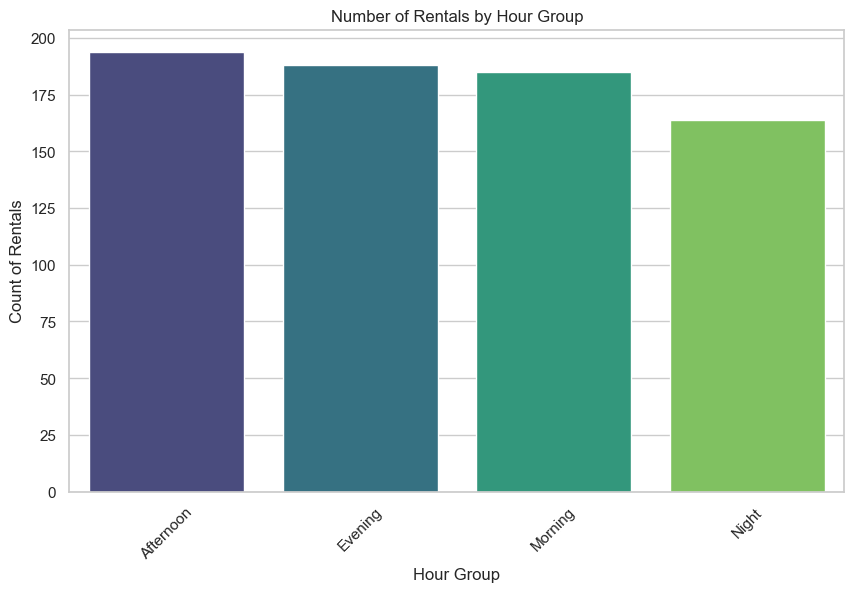

In [269]:
# Count the number of rentals for each Hour Group
hour_group_counts = day_dt['Hour Group'].value_counts().reset_index()
hour_group_counts.columns = ['Hour Group', 'Count']

# Set the style for seaborn
sns.set(style='whitegrid')

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour Group', y='Count', data=hour_group_counts, hue='Hour Group', palette='viridis')
plt.title('Number of Rentals by Hour Group')
plt.xlabel('Hour Group')
plt.ylabel('Count of Rentals')
plt.xticks(rotation=45)
plt.show()

Dari diagram tersebut dapat dilihat perbedaan penyewa dari tiap jam

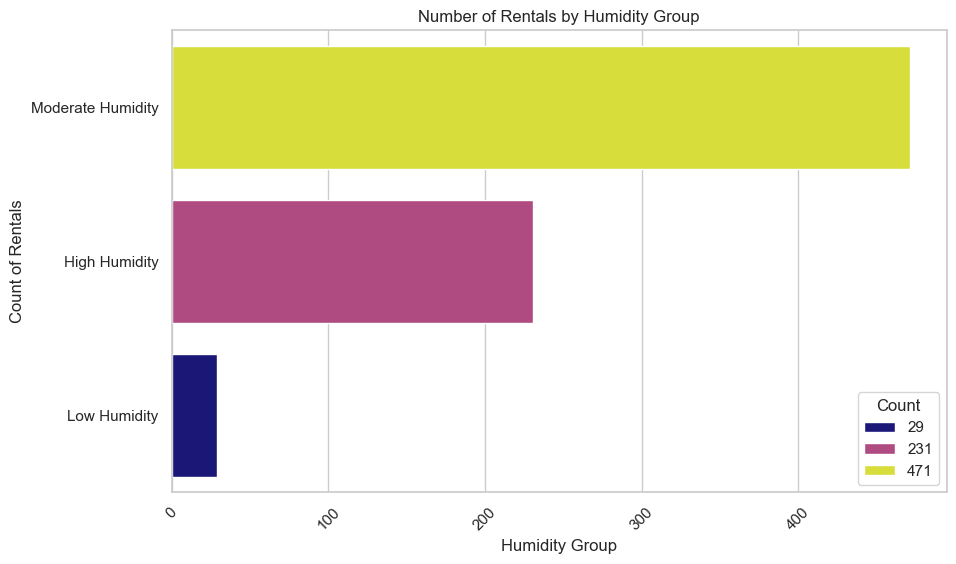

In [274]:
# Style 
sns.set(style='whitegrid')

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Humidity Group', data=humidity_group_counts, hue='Count', palette='plasma')
plt.title('Number of Rentals by Humidity Group')
plt.xlabel('Humidity Group')
plt.ylabel('Count of Rentals')
plt.xticks(rotation=45)
plt.show()

Dari diagram di atas dapat dilihat tingkat penyewa berdasarkan kelembapan udara

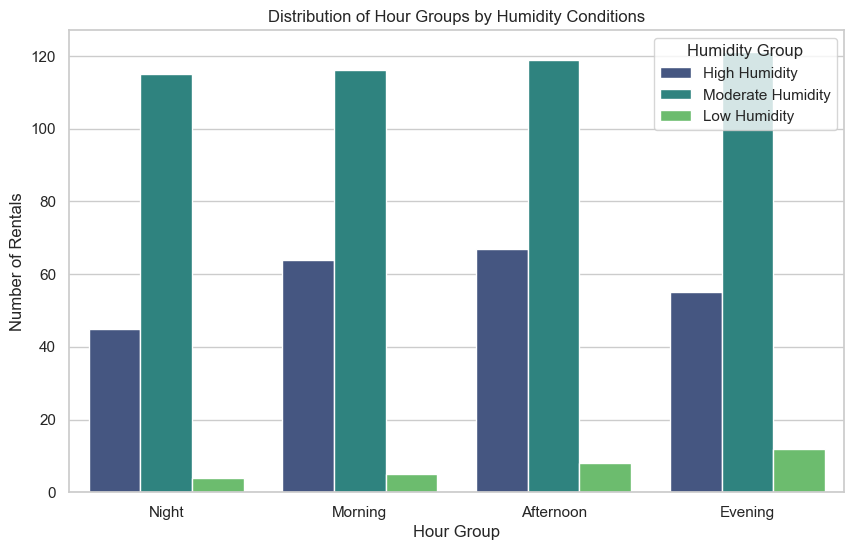

In [275]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a count plot for Hour Group by Humidity Group
plt.figure(figsize=(10, 6))
sns.countplot(data=day_dt, x='Hour Group', hue='Humidity Group', palette='viridis')
plt.title('Distribution of Hour Groups by Humidity Conditions')
plt.ylabel('Number of Rentals')
plt.xlabel('Hour Group')
plt.legend(title='Humidity Group')
plt.show()

Dari diagram di atas dapat dilihat perbedaan kelembapan udara di setiap jam 

## Conclusion

- Pertanyaan 1 : 
  perubahan suhu dapat mempengaruhi penyewaan sepeda. Secara umum, ketika suhu meningkat, orang cenderung lebih banyak menyewa sepeda karena kondisi cuaca yang lebih nyaman untuk bersepeda. Pada suhu yang lebih dingin atau terlalu panas, penyewaan sepeda mungkin menurun karena cuaca tidak mendukung aktivitas luar ruangan. Analisis data cuaca (seperti suhu rata-rata harian) terhadap jumlah sepeda yang disewa dalam dataset dapat menunjukkan korelasi antara kedua variabel ini.
- Pertanyaan 2 : 
  Tingkat penyewaan sepeda cenderung tertinggi pada musim semi dan musim panas, ketika cuaca lebih hangat dan hari lebih panjang. Orang lebih cenderung untuk bersepeda pada bulan-bulan dengan kondisi cuaca yang ideal. Selain itu, akhir pekan dan hari libur mungkin menunjukkan puncak penyewaan yang lebih tinggi dibandingkan hari kerja, karena lebih banyak orang memiliki waktu luang untuk bersepeda.

Cuaca dan musim sangat mempengaruhi prosedur penyewaan sepeda. Penyedia layanan dapat memanfaatkan insight ini untuk dijadikan referensi kedepannya agar memaksimalkan penyewaan sepeda pada cuaca dan musim tertentu